In [1]:
!pip install signed_backbones

You should consider upgrading via the 'c:\users\furkan\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import signed_backbones as sb

# Figure 1

## Figure 1. Migration

In [3]:
migration = pd.read_csv('usmigration2018.csv', header=None)
migration.shape

(2550, 3)

In [4]:
%%capture

extraction_results1 = []
for a in np.arange(0, 51, 1):
  a = np.round(a, 2)
  extracted_edges = pd.DataFrame(sb.extract(migration, significance_threshold = a, vigor_threshold=(0,0)))
  vcount = len(set(extracted_edges.iloc[:, 0]) | set(extracted_edges.iloc[:, 1]))
  counts = extracted_edges.groupby(by=2).count().iloc[:, 0]
  try:
    p = counts[1]
  except:
    p = 0
  try:
    n = counts[-1]
  except:
    n = 0
  
  extraction_results1.append([a,p,n,vcount])

extraction_results2 = []
for a in np.arange(0, 51, 1):
  a = np.round(a, 2)
  extracted_edges = pd.DataFrame(sb.extract(migration, significance_threshold = a, vigor_threshold=(-0.33,0.33)))
  vcount = len(set(extracted_edges.iloc[:, 0]) | set(extracted_edges.iloc[:, 1]))
  counts = extracted_edges.groupby(by=2).count().iloc[:, 0]
  try:
    p = counts[1]
  except:
    p = 0
  try:
    n = counts[-1]
  except:
    n = 0
  extraction_results2.append([a,p,n,vcount])

extraction_results3 = []
for a in np.arange(0, 51, 1):
  a = np.round(a, 2)
  extracted_edges = pd.DataFrame(sb.extract(migration, significance_threshold = a, vigor_threshold=(-0.5,0.1)))
  vcount = len(set(extracted_edges.iloc[:, 0]) | set(extracted_edges.iloc[:, 1]))
  counts = extracted_edges.groupby(by=2).count().iloc[:, 0]
  try:
    p = counts[1]
  except:
    p = 0
  try:
    n = counts[-1]
  except:
    n = 0
  extraction_results3.append([a,p,n,vcount])

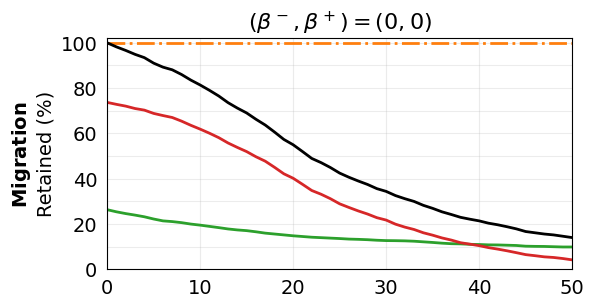

In [5]:
#1
r = pd.DataFrame(extraction_results1, columns = ['alpha', 'pos', 'neg', 'vcount'])
r.pos = r.pos / 2550
r.neg = r.neg / 2550
r.tot = r.pos + r.neg
r.nod = r.vcount / 51
plt.style.use('default') 
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(6,3))

plt.plot(r.alpha, r.nod, 'tab:orange', label="Nodes", linewidth = 2, linestyle='dashdot')
plt.plot(r.alpha, r.pos, 'tab:green', label="Positive edges", linewidth = 2)
plt.plot(r.alpha, r.neg, 'tab:red',  label="Negative edges", linewidth = 2)
plt.plot(r.alpha, r.tot, 'black',  label="All edges", linewidth = 2)

# plt.xlabel(r'$\alpha$', fontsize= 16)
plt.xticks(ticks =[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylabel(r"$\bf{" + 'Migration' + "}$ \n" + "Retained (%)")
plt.yticks(ticks =[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],  labels = ['0', '', '20', '', '40', '', '60', '', '80', '', '100'])
plt.grid(True)
plt.ylim((0, 1.02))
plt.xlim((0, 50))
plt.title(r'$(\beta^-, \beta^+) = (0, 0)$', fontsize = 16)
plt.tick_params(axis='y', left=False, grid_alpha = 0.23)
plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
plt.show()

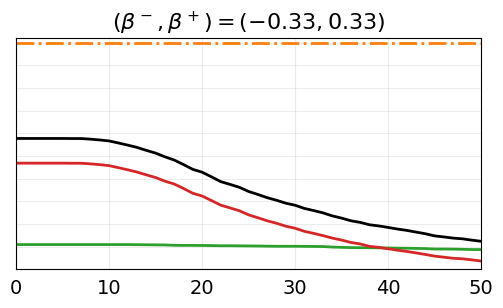

In [6]:
#2
r = pd.DataFrame(extraction_results2, columns = ['alpha', 'pos', 'neg', 'vcount'])
r.pos = r.pos / 2550
r.neg = r.neg / 2550
r.tot = r.pos + r.neg
r.nod = r.vcount / 51
plt.style.use('default') 
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(6,3))
plt.plot(r.alpha, r.nod, 'tab:orange', label="Nodes", linewidth = 2, linestyle='dashdot')
plt.plot(r.alpha, r.pos, 'tab:green', label="Positive edges", linewidth = 2)
plt.plot(r.alpha, r.neg, 'tab:red',  label="Negative edges", linewidth = 2)
plt.plot(r.alpha, r.tot, 'black',  label="All edges", linewidth = 2)

# plt.xlabel(r'$\alpha$', fontsize= 16)
plt.xticks(ticks =[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
#plt.ylabel(r'Retained')
plt.yticks(ticks =[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],  labels = [])#'0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.grid(True)
plt.ylim((0, 1.02))
plt.xlim((0, 50))
plt.title(r'$(\beta^-, \beta^+) = (-0.33, 0.33)$', fontsize = 16)
plt.tick_params(axis='y', left=False, grid_alpha = 0.23)
plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
plt.show()

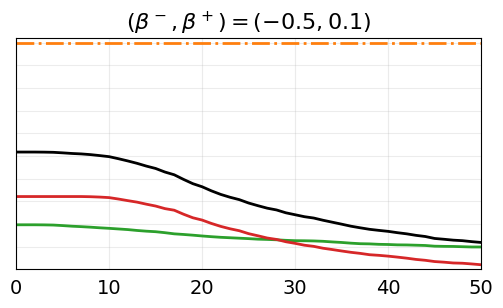

In [7]:
#3
r = pd.DataFrame(extraction_results3, columns = ['alpha', 'pos', 'neg', 'vcount'])
r.pos = r.pos / 2550
r.neg = r.neg / 2550
r.tot = r.pos + r.neg
r.nod = r.vcount / 51
plt.style.use('default') 
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(6,3))
plt.plot(r.alpha, r.nod, 'tab:orange', label="Nodes", linewidth = 2, linestyle='dashdot')
plt.plot(r.alpha, r.pos, 'tab:green', label="Positive edges", linewidth = 2)
plt.plot(r.alpha, r.neg, 'tab:red',  label="Negative edges", linewidth = 2)
plt.plot(r.alpha, r.tot, 'black',  label="All edges", linewidth = 2)

# plt.xlabel(r'$\alpha$', fontsize= 16)
plt.xticks(ticks =[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
#plt.ylabel(r'Retained')
plt.yticks(ticks =[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],  labels =[])# ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.grid(True)
plt.ylim((0, 1.02))
plt.xlim((0, 50))
plt.title(r'$(\beta^-, \beta^+) = (-0.5, 0.1)$', fontsize = 16)
plt.tick_params(axis='y', left=False, grid_alpha = 0.23)
plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
plt.show()

## Figure 1. Eurovision

In [8]:
eurovision = pd.read_csv('eurovision2003.csv', header=None)
eurovision.shape

(260, 3)

In [9]:
%%capture

extraction_results1 = []
for a in np.arange(0, 3.1, 0.05):
  a = np.round(a, 3)
  extracted_edges = pd.DataFrame(sb.extract(eurovision, significance_threshold = a, vigor_threshold=(0,0)))
  vcount = len(set(extracted_edges.iloc[:, 0]) | set(extracted_edges.iloc[:, 1]))
  counts = extracted_edges.groupby(by=2).count().iloc[:, 0]
  try:
    p = counts[1]
  except:
    p = 0
  try:
    n = counts[-1]
  except:
    n = 0
  extraction_results1.append([a,p,n,vcount])

extraction_results2 = []
for a in np.arange(0, 3.1, 0.05):
  a = np.round(a, 3)
  extracted_edges = pd.DataFrame(sb.extract(eurovision, significance_threshold = a, vigor_threshold=(-0.33,0.33)))
  vcount = len(set(extracted_edges.iloc[:, 0]) | set(extracted_edges.iloc[:, 1]))
  counts = extracted_edges.groupby(by=2).count().iloc[:, 0]
  try:
    p = counts[1]
  except:
    p = 0
  try:
    n = counts[-1]
  except:
    n = 0
  extraction_results2.append([a,p,n,vcount])

extraction_results3 = []
for a in np.arange(0, 3.1, 0.05):
  a = np.round(a, 3)
  extracted_edges = pd.DataFrame(sb.extract(eurovision, significance_threshold = a, vigor_threshold=(-0.5,0.1)))
  vcount = len(set(extracted_edges.iloc[:, 0]) | set(extracted_edges.iloc[:, 1]))
  counts = extracted_edges.groupby(by=2).count().iloc[:, 0]
  try:
    p = counts[1]
  except:
    p = 0
  try:
    n = counts[-1]
  except:
    n = 0
  extraction_results3.append([a,p,n,vcount])

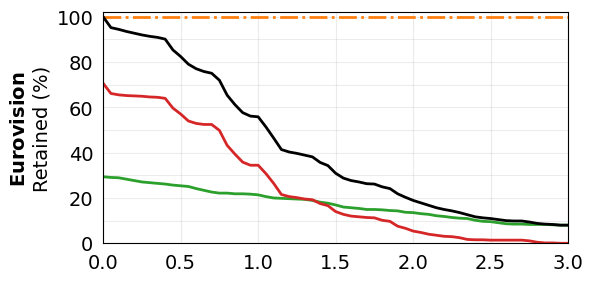

In [10]:
#1
r = pd.DataFrame(extraction_results1, columns = ['alpha', 'pos', 'neg', 'vcount'])
r.pos = r.pos / 650
r.neg = r.neg / 650
r.tot = r.pos + r.neg
r.nod = r.vcount / 26
plt.style.use('default') 
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(6,3))
plt.plot(r.alpha, r.nod, 'tab:orange', label="Nodes", linewidth = 2, linestyle='dashdot')
plt.plot(r.alpha, r.pos, 'tab:green', label="Positive edges", linewidth = 2)
plt.plot(r.alpha, r.neg, 'tab:red',  label="Negative edges", linewidth = 2)
plt.plot(r.alpha, r.tot, 'black',  label="All edges", linewidth = 2)

# plt.xlabel(r'$\alpha$', fontsize= 16)
plt.xticks(ticks =[0, 0.5, 1, 1.5, 2, 2.5, 3])
plt.ylabel(r"$\bf{" + 'Eurovision' + "}$ \n" + "Retained (%)")
plt.yticks(ticks =[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],  labels = ['0', '', '20', '', '40', '', '60', '', '80', '', '100'])
plt.grid(True)
plt.ylim((0, 1.02))
plt.xlim((0, 3))
# plt.title(r'$(\beta^-, \beta^+) = (0, 0)$', fontsize = 16)
plt.tick_params(axis='y', left=False, grid_alpha = 0.23)
plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
plt.show()

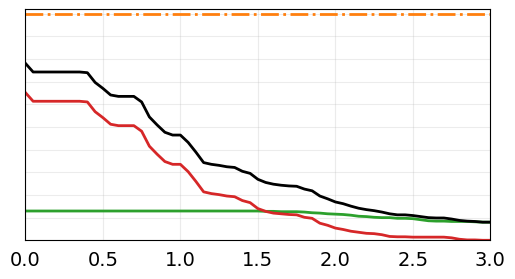

In [11]:
#2
r = pd.DataFrame(extraction_results2, columns = ['alpha', 'pos', 'neg', 'vcount'])
r.pos = r.pos / 650
r.neg = r.neg / 650
r.tot = r.pos + r.neg
r.nod = r.vcount / 26
plt.style.use('default') 
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(6,3))
plt.plot(r.alpha, r.nod, 'tab:orange', label="Nodes", linewidth = 2, linestyle='dashdot')
plt.plot(r.alpha, r.pos, 'tab:green', label="Positive edges", linewidth = 2)
plt.plot(r.alpha, r.neg, 'tab:red',  label="Negative edges", linewidth = 2)
plt.plot(r.alpha, r.tot, 'black',  label="All edges", linewidth = 2)

# plt.xlabel(r'$\alpha$', fontsize= 16)
plt.xticks(ticks =[0, 0.5, 1, 1.5, 2, 2.5, 3])
#plt.ylabel(r'Retained')
plt.yticks(ticks =[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],  labels = [])#'0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.grid(True)
plt.ylim((0, 1.02))
plt.xlim((0, 3))
# plt.title(r'$(\beta^-, \beta^+) = (-0.33, 0.33)$', fontsize = 16)
plt.tick_params(axis='y', left=False, grid_alpha = 0.23)
plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
plt.show()

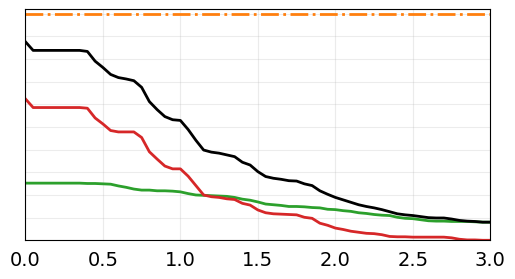

In [12]:
#3
r = pd.DataFrame(extraction_results3, columns = ['alpha', 'pos', 'neg', 'vcount'])
r.pos = r.pos / 650
r.neg = r.neg / 650
r.tot = r.pos + r.neg
r.nod = r.vcount / 26
plt.style.use('default') 
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(6,3))
plt.plot(r.alpha, r.nod, 'tab:orange', label="Nodes", linewidth = 2, linestyle='dashdot')
plt.plot(r.alpha, r.pos, 'tab:green', label="Positive edges", linewidth = 2)
plt.plot(r.alpha, r.neg, 'tab:red',  label="Negative edges", linewidth = 2)
plt.plot(r.alpha, r.tot, 'black',  label="All edges", linewidth = 2)

# plt.xlabel(r'$\alpha$', fontsize= 16)
plt.xticks(ticks =[0, 0.5, 1, 1.5, 2, 2.5, 3])
#plt.ylabel(r'Retained')
plt.yticks(ticks =[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],  labels = [])#'0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.grid(True)
plt.ylim((0, 1.02))
plt.xlim((0, 3))
# plt.title(r'$(\beta^-, \beta^+) = (-0.5, 0.1)$', fontsize = 16)
plt.tick_params(axis='y', left=False, grid_alpha = 0.23)
plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
plt.show()

## Figure 1.  Hypertext

In [13]:
hypertext = pd.read_csv('hypertext2009.csv', header=None)
hypertext.shape

(2196, 3)

In [14]:
%%capture

extraction_results1 = []
for a in np.arange(0, 3.1, 0.05):
  a = np.round(a, 3)
  extracted_edges = pd.DataFrame(sb.extract(hypertext, directed=False, significance_threshold = a, vigor_threshold=(0,0)))
  vcount = len(set(extracted_edges.iloc[:, 0]) | set(extracted_edges.iloc[:, 1]))
  counts = extracted_edges.groupby(by=2).count().iloc[:, 0]
  try:
    p = counts[1]
  except:
    p = 0
  try:
    n = counts[-1]
  except:
    n = 0
  extraction_results1.append([a,p,n,vcount])


extraction_results2 = []
for a in np.arange(0, 3.1, 0.05):
  a = np.round(a, 3)
  extracted_edges = pd.DataFrame(sb.extract(hypertext, directed=False, significance_threshold = a, vigor_threshold=(-0.33,0.33)))
  vcount = len(set(extracted_edges.iloc[:, 0]) | set(extracted_edges.iloc[:, 1]))
  counts = extracted_edges.groupby(by=2).count().iloc[:, 0]
  try:
    p = counts[1]
  except:
    p = 0
  try:
    n = counts[-1]
  except:
    n = 0
  extraction_results2.append([a,p,n,vcount])




extraction_results3 = []
for a in np.arange(0, 3.1, 0.05):
  a = np.round(a, 3)
  extracted_edges = pd.DataFrame(sb.extract(hypertext, directed=False, significance_threshold = a, vigor_threshold=(-0.5,0.1)))
  vcount = len(set(extracted_edges.iloc[:, 0]) | set(extracted_edges.iloc[:, 1]))
  counts = extracted_edges.groupby(by=2).count().iloc[:, 0]
  try:
    p = counts[1]
  except:
    p = 0
  try:
    n = counts[-1]
  except:
    n = 0
  extraction_results3.append([a,p,n,vcount])


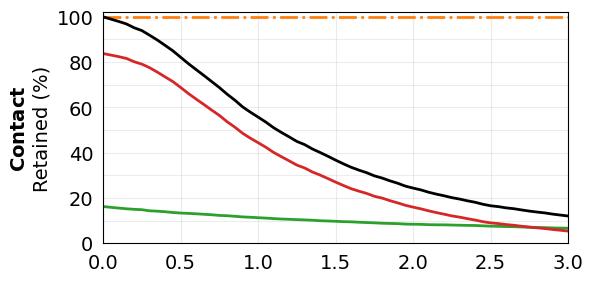

In [15]:
#1
r = pd.DataFrame(extraction_results1, columns = ['alpha', 'pos', 'neg', 'vcount'])
r.pos = r.pos / 6328
r.neg = r.neg / 6328
r.tot = r.pos + r.neg
r.nod = r.vcount / 113
plt.style.use('default') 
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(6,3))
plt.plot(r.alpha, r.nod, 'tab:orange', label="Nodes", linewidth = 2, linestyle='dashdot')
plt.plot(r.alpha, r.pos, 'tab:green', label="Positive edges", linewidth = 2)
plt.plot(r.alpha, r.neg, 'tab:red',  label="Negative edges", linewidth = 2)
plt.plot(r.alpha, r.tot, 'black',  label="All edges", linewidth = 2)

# plt.xlabel(r'$\alpha$', fontsize= 16)
plt.xticks(ticks =[0, 0.5, 1, 1.5, 2, 2.5, 3])
plt.ylabel(r"$\bf{" + 'Contact' + "}$ \n" + "Retained (%)")
plt.yticks(ticks =[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],  labels = ['0', '', '20', '', '40', '', '60', '', '80', '', '100'])
plt.grid(True)
plt.ylim((0, 1.02))
plt.xlim((0, 3))
# plt.title(r'$(\beta^-, \beta^+) = (0, 0)$', fontsize = 16)
plt.tick_params(axis='y', left=False, grid_alpha = 0.23)
plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
plt.show()

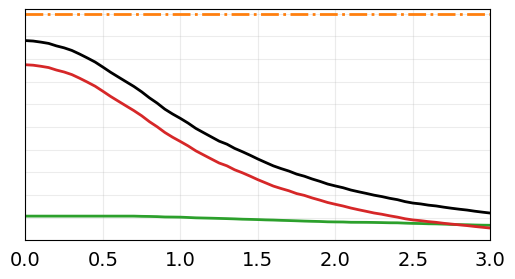

In [16]:
#2
r = pd.DataFrame(extraction_results2, columns = ['alpha', 'pos', 'neg', 'vcount'])
r.pos = r.pos / 6328
r.neg = r.neg / 6328
r.tot = r.pos + r.neg
r.nod = r.vcount / 113
plt.style.use('default') 
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(6,3))
plt.plot(r.alpha, r.nod, 'tab:orange', label="Nodes", linewidth = 2, linestyle='dashdot')
plt.plot(r.alpha, r.pos, 'tab:green', label="Positive edges", linewidth = 2)
plt.plot(r.alpha, r.neg, 'tab:red',  label="Negative edges", linewidth = 2)
plt.plot(r.alpha, r.tot, 'black',  label="All edges", linewidth = 2)

# plt.xlabel(r'$\alpha$', fontsize= 16)
plt.xticks(ticks =[0, 0.5, 1, 1.5, 2, 2.5, 3])
# plt.ylabel(r'Retained')
plt.yticks(ticks =[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],  labels = [])#'0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.grid(True)
plt.ylim((0, 1.02))
plt.xlim((0, 3))
# plt.title(r'$(\beta^-, \beta^+) = (-0.33, 0.33)$', fontsize = 16)
plt.tick_params(axis='y', left=False, grid_alpha = 0.23)
plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
plt.show()

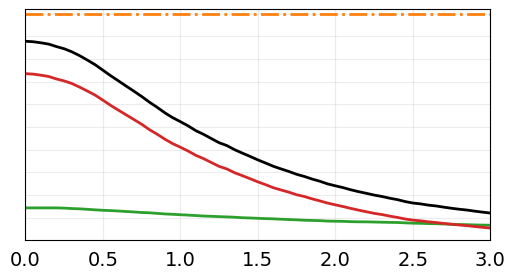

In [17]:
#3
r = pd.DataFrame(extraction_results3, columns = ['alpha', 'pos', 'neg', 'vcount'])
r.pos = r.pos / 6328
r.neg = r.neg / 6328
r.tot = r.pos + r.neg
r.nod = r.vcount / 113
plt.style.use('default') 
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(6,3))
plt.plot(r.alpha, r.nod, 'tab:orange', label="Nodes", linewidth = 2, linestyle='dashdot')
plt.plot(r.alpha, r.pos, 'tab:green', label="Positive edges", linewidth = 2)
plt.plot(r.alpha, r.neg, 'tab:red',  label="Negative edges", linewidth = 2)
plt.plot(r.alpha, r.tot, 'black',  label="All edges", linewidth = 2)

# plt.xlabel(r'$\alpha$', fontsize= 16)
plt.xticks(ticks =[0, 0.5, 1, 1.5, 2, 2.5, 3])
# plt.ylabel(r'Retained')
plt.yticks(ticks =[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],  labels = [])#'0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.grid(True)
plt.ylim((0, 1.02))
plt.xlim((0, 3))
# plt.title(r'$(\beta^-, \beta^+) = (-0.5, 0.1)$', fontsize = 16)
plt.tick_params(axis='y', left=False, grid_alpha = 0.23)
plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
plt.show()

## Figure 1. Species

In [18]:
species = pd.read_csv('species.csv', header=None)
species.shape

(1801, 3)

In [19]:
62*61/2

1891.0

In [20]:
%%capture

extraction_results1 = []
for a in np.arange(0, 5.1, 0.05):
  a = np.round(a, 3)
  extracted_edges = pd.DataFrame(sb.extract(species, directed=False, significance_threshold = a, vigor_threshold=(0,0)))
  vcount = len(set(extracted_edges.iloc[:, 0]) | set(extracted_edges.iloc[:, 1]))
  counts = extracted_edges.groupby(by=2).count().iloc[:, 0]
  try:
    p = counts[1]
  except:
    p = 0
  try:
    n = counts[-1]
  except:
    n = 0
  extraction_results1.append([a,p,n,vcount])


extraction_results2 = []
for a in np.arange(0, 5.1, 0.05):
  a = np.round(a, 3)
  extracted_edges = pd.DataFrame(sb.extract(species, directed=False, significance_threshold = a, vigor_threshold=(-0.33,0.33)))
  vcount = len(set(extracted_edges.iloc[:, 0]) | set(extracted_edges.iloc[:, 1]))
  counts = extracted_edges.groupby(by=2).count().iloc[:, 0]
  try:
    p = counts[1]
  except:
    p = 0
  try:
    n = counts[-1]
  except:
    n = 0
  extraction_results2.append([a,p,n,vcount])



extraction_results3 = []
for a in np.arange(0, 5.1, 0.05):
  a = np.round(a, 3)
  extracted_edges = pd.DataFrame(sb.extract(species, directed=False, significance_threshold = a, vigor_threshold=(-0.5,0.1)))
  vcount = len(set(extracted_edges.iloc[:, 0]) | set(extracted_edges.iloc[:, 1]))
  counts = extracted_edges.groupby(by=2).count().iloc[:, 0]
  try:
    p = counts[1]
  except:
    p = 0
  try:
    n = counts[-1]
  except:
    n = 0
  extraction_results3.append([a,p,n,vcount])


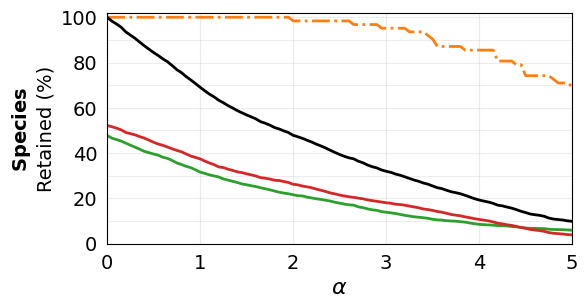

In [21]:
#1
r = pd.DataFrame(extraction_results1, columns = ['alpha', 'pos', 'neg', 'vcount'])
r.pos = r.pos / 1891
r.neg = r.neg / 1891
r.tot = r.pos + r.neg
r.nod = r.vcount / 62
plt.style.use('default') 
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(6,3))
plt.plot(r.alpha, r.nod, 'tab:orange', label="Nodes", linewidth = 2, linestyle='dashdot')
plt.plot(r.alpha, r.pos, 'tab:green', label="Positive edges", linewidth = 2)
plt.plot(r.alpha, r.neg, 'tab:red',  label="Negative edges", linewidth = 2)
plt.plot(r.alpha, r.tot, 'black',  label="All edges", linewidth = 2)

plt.xlabel(r'$\alpha$', fontsize= 16)
plt.xticks(ticks =[0, 1, 2, 3, 4, 5])
plt.ylabel(r"$\bf{" + 'Species' + "}$ \n" + "Retained (%)")
plt.yticks(ticks =[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],  labels = ['0', '', '20', '', '40', '', '60', '', '80', '', '100'])
plt.grid(True)
plt.ylim((0, 1.02))
plt.xlim((0, 5))
# plt.title(r'$(\beta^-, \beta^+) = (0, 0)$', fontsize = 16)
plt.tick_params(axis='y', left=False, grid_alpha = 0.23)
plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
plt.show()

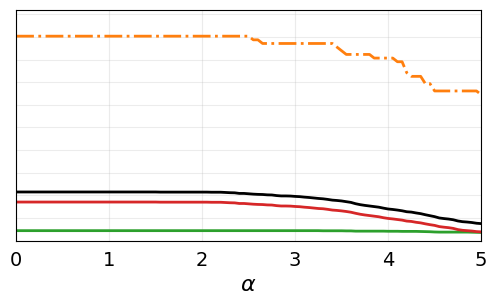

In [22]:
#2
r = pd.DataFrame(extraction_results2, columns = ['alpha', 'pos', 'neg', 'vcount'])
r.pos = r.pos / 1891
r.neg = r.neg / 1891
r.tot = r.pos + r.neg
r.nod = r.vcount / 62
plt.style.use('default') 
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(6,3))
plt.plot(r.alpha, r.nod, 'tab:orange', label="Nodes", linewidth = 2, linestyle='dashdot')
plt.plot(r.alpha, r.pos, 'tab:green', label="Positive edges", linewidth = 2)
plt.plot(r.alpha, r.neg, 'tab:red',  label="Negative edges", linewidth = 2)
plt.plot(r.alpha, r.tot, 'black',  label="All edges", linewidth = 2)

plt.xlabel(r'$\alpha$', fontsize= 16)
plt.xticks(ticks =[0, 1, 2, 3, 4, 5])
# plt.ylabel(r'Retained')
plt.yticks(ticks =[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],  labels = [])#'0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.grid(True)
plt.ylim((0, 1.02))
plt.xlim((0, 5))
# plt.title(r'$(\beta^-, \beta^+) = (-0.33, 0.33)$', fontsize = 16)
plt.tick_params(axis='y', left=False, grid_alpha = 0.23)
plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
plt.show()

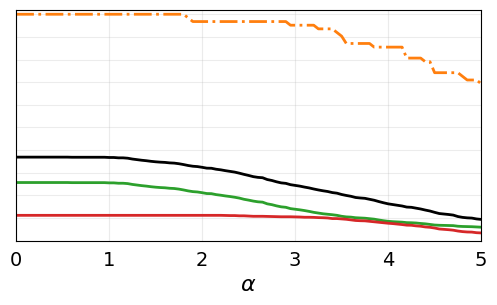

In [23]:
#3
r = pd.DataFrame(extraction_results3, columns = ['alpha', 'pos', 'neg', 'vcount'])
r.pos = r.pos / 1891
r.neg = r.neg / 1891
r.nod = r.vcount / 62
r.tot = r.pos + r.neg
plt.style.use('default') 
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(6,3))
plt.plot(r.alpha, r.nod, 'tab:orange', label="Nodes", linewidth = 2, linestyle='dashdot')
plt.plot(r.alpha, r.pos, 'tab:green', label="Positive edges", linewidth = 2)
plt.plot(r.alpha, r.neg, 'tab:red',  label="Negative edges", linewidth = 2)
plt.plot(r.alpha, r.tot, 'black',  label="All edges", linewidth = 2)

plt.xlabel(r'$\alpha$', fontsize= 16)
plt.xticks(ticks =[0, 1, 2, 3, 4, 5])
# plt.ylabel(r'Retained')
plt.yticks(ticks =[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],  labels = [])#'0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.grid(True)
plt.ylim((0, 1.02))
plt.xlim((0, 5))
# plt.title(r'$(\beta^-, \beta^+) = (-0.5, 0.1)$', fontsize = 16)
plt.tick_params(axis='y', left=False, grid_alpha = 0.23)
plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
plt.show()

## Arbitrary figure for for producing the legend 

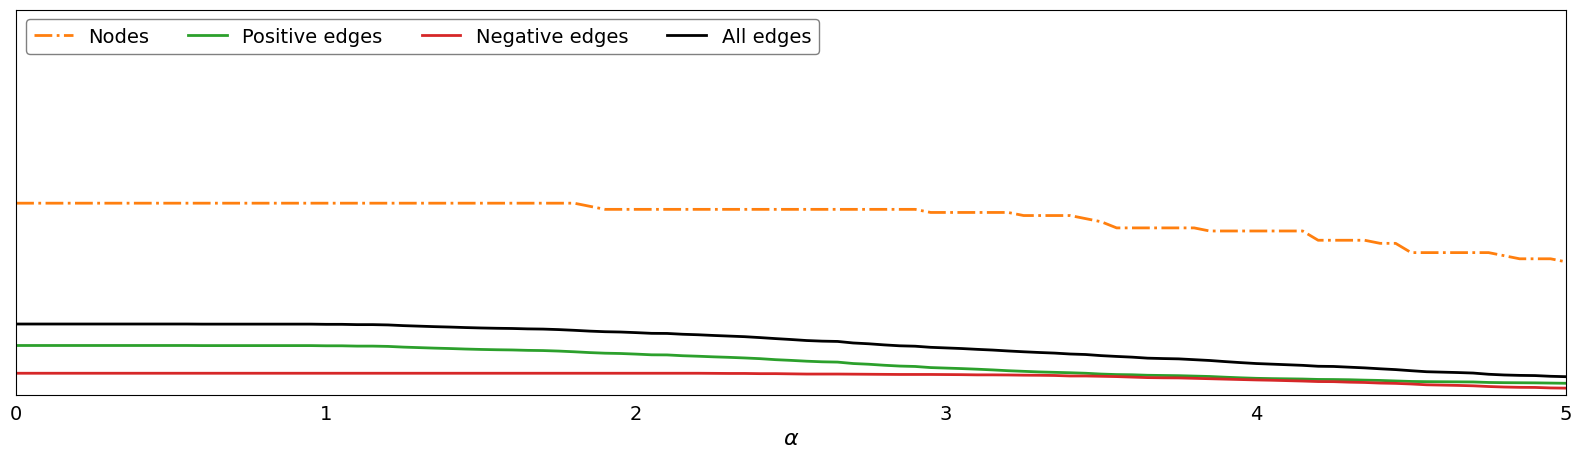

In [24]:
#this is an arbitrary figure with the sole purpose of creating the legend figure/image
r = pd.DataFrame(extraction_results3, columns = ['alpha', 'pos', 'neg', 'vcount'])
r.pos = r.pos / 1891
r.neg = r.neg / 1891
r.nod = r.vcount / 62
r.tot = r.pos + r.neg
plt.style.use('default') 
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(20,5))
plt.plot(r.alpha, r.nod, 'tab:orange', label="Nodes", linewidth = 2, linestyle='dashdot')
plt.plot(r.alpha, r.pos, 'tab:green', label="Positive edges", linewidth = 2)
plt.plot(r.alpha, r.neg, 'tab:red',  label="Negative edges", linewidth = 2)
plt.plot(r.alpha, r.tot, 'black',  label="All edges", linewidth = 2)

plt.xlabel(r'$\alpha$', fontsize= 16)
plt.xticks(ticks =[0, 1, 2, 3, 4, 5])
# plt.ylabel(r'Retained')
plt.yticks(ticks =[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],  labels = [])#'0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.grid(False)
plt.ylim((0, 2.01))
plt.xlim((0, 5))
# plt.title(r'$(\beta^-, \beta^+) = (-0.5, 0.1)$', fontsize = 16)
plt.tick_params(axis='y', left=False, grid_alpha = 0.23)
plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
plt.legend(loc = 2, ncol = 4, framealpha = 1, edgecolor = 'gray', fancybox = True)
plt.show()